<a href="https://colab.research.google.com/github/followviny/Data-analysis/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0__HSE_analytics_HT1_ipynb__(2)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Мы будем работать с датасетом про покупки клиентов в онлайн-магазине. По характеристикам клиентов нам нужно понять, купит клиент товар или нет.

Целевая величина - Revenue (факт покупки).

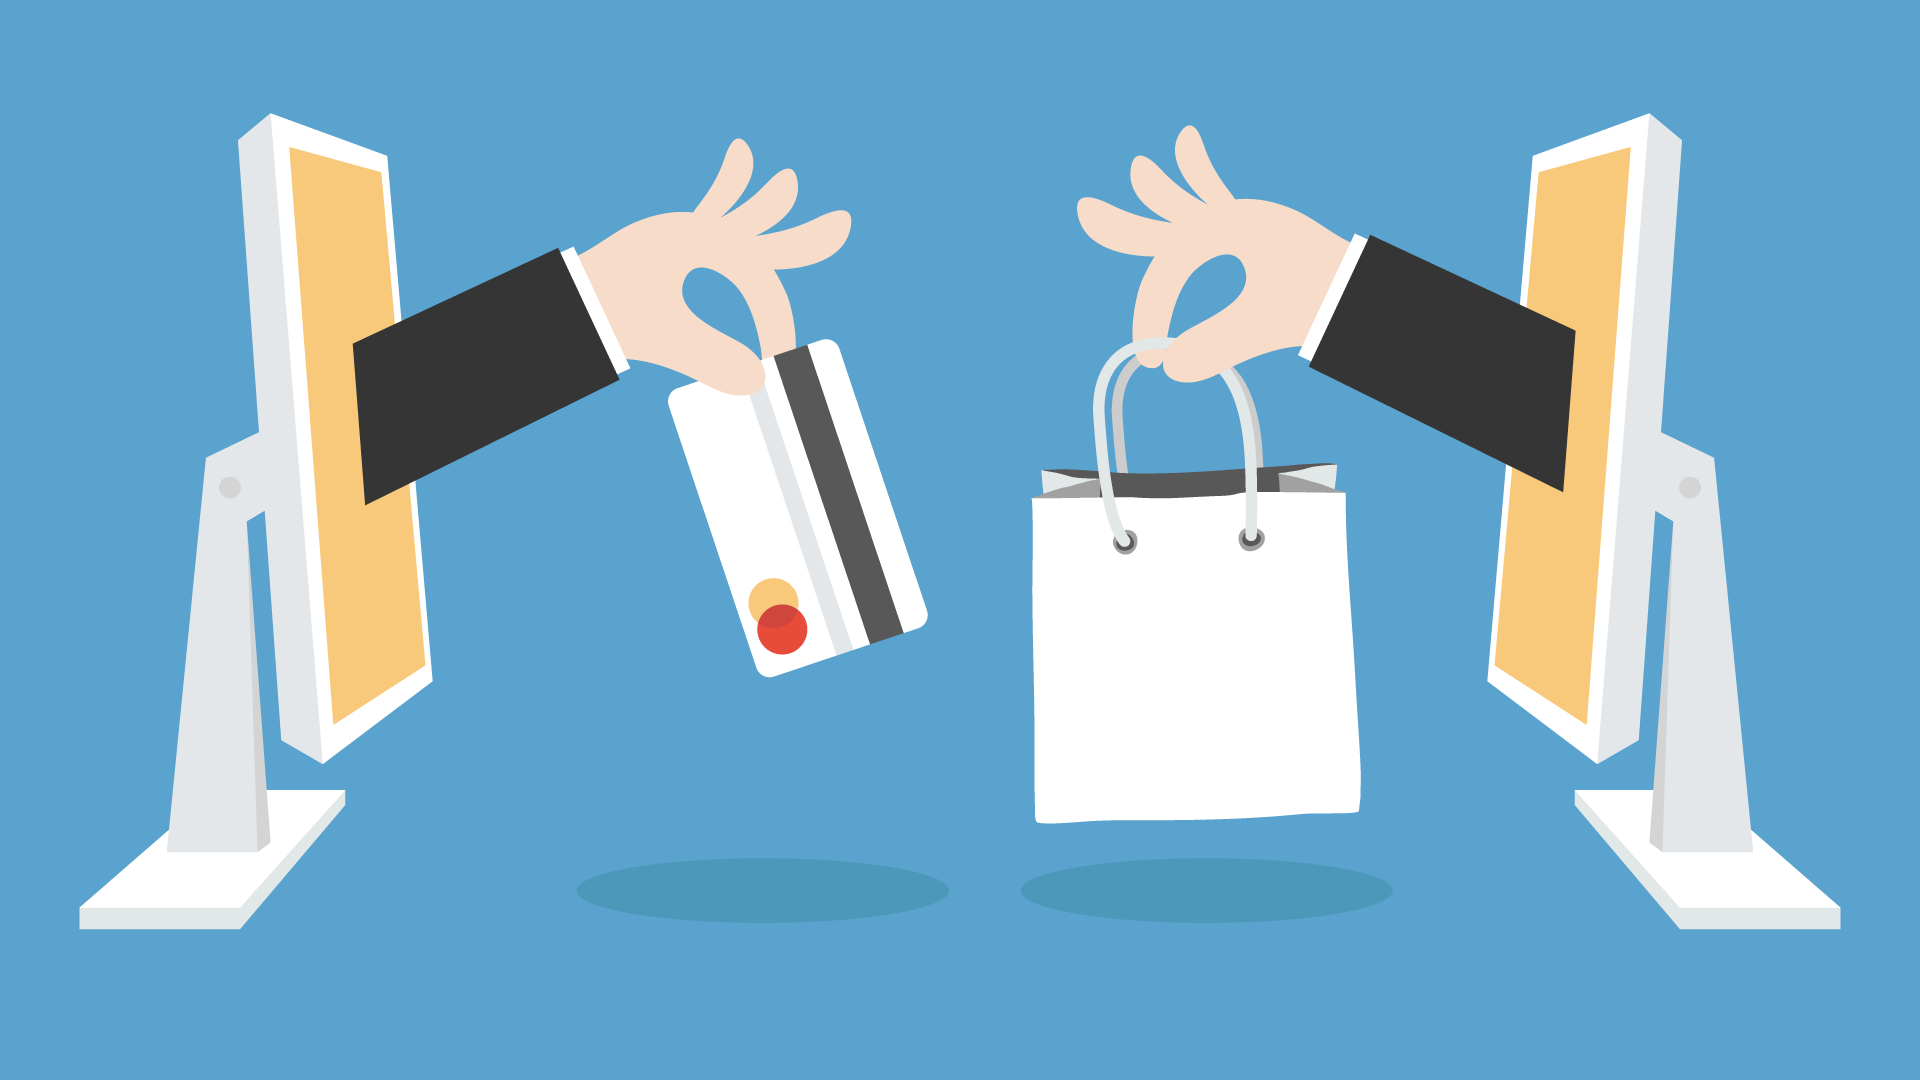

## Импорт библиотек и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATASET = "https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/main/datasets/online_shoppers_intention.csv"

In [ ]:
df = pd.read_csv(DATASET)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Описание данных

**Online Shoppers Purchasing Intention Dataset**

The `Revenue` attribute can be used as the class label.

* `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related` and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

* `Bounce Rate`, `Exit Rate` and `Page Value` features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of Bounce Rate feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The Page Value feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

* The `Special Day` feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Задание 0

Изучите данные:

* Посмотрите на названия колонок

* Выведите на экран 10 случайных строк таблицы

* Посмотрите на размер таблицы

In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4865,1,0.00,3,92.5,9,359.166667,0.000000,0.018182,58.167273,0.0,May,1,1,1,5,New_Visitor,False,True
8377,5,98.75,0,0.0,126,6085.002381,0.000000,0.004264,28.798471,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
2113,2,16.50,0,0.0,5,37.500000,0.000000,0.033333,0.000000,0.0,May,2,2,1,3,Returning_Visitor,False,False
3580,0,0.00,0,0.0,38,2259.200000,0.022222,0.037963,0.000000,0.2,May,2,2,7,11,Returning_Visitor,False,False
9475,3,74.50,1,88.0,113,3770.021698,0.008005,0.019005,14.850517,0.0,Dec,3,2,1,1,Returning_Visitor,True,False
6343,3,40.55,0,0.0,10,151.081818,0.008333,0.038889,0.000000,0.0,Jul,2,2,1,5,New_Visitor,False,False
6734,4,40.20,1,0.0,12,2339.207143,0.011111,0.036944,0.000000,0.0,Nov,1,1,1,2,Returning_Visitor,False,False
7466,1,23.20,0,0.0,24,704.566667,0.000000,0.011538,14.220496,0.0,Aug,2,2,2,1,Returning_Visitor,False,False
7493,3,145.20,0,0.0,11,1646.366667,0.000000,0.027778,0.000000,0.0,June,2,2,2,1,Returning_Visitor,False,False
8518,0,0.00,0,0.0,13,257.000000,0.035714,0.078571,0.000000,0.0,Nov,1,1,2,2,Returning_Visitor,False,False


In [ ]:
df.shape

(12330, 18)

## Исследование данных

## Задание 1

В скольких столбцах таблицы есть пропущенные значения?

In [ ]:
columns_with_missing_values = df.isnull().sum()
print(columns_with_missing_values)

Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration     199
ProductRelated               0
ProductRelated_Duration    491
BounceRates                  0
ExitRates                   99
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems             0
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64


In [ ]:
answer1 = 0
for i in columns_with_missing_values:
  if i > 0:
    answer1 += 1
print(answer1)         # answer - 3

3


## Задание 2

В скольких числовых столбцах медиана больше среднего значения?

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
desc = df.describe()
mean = desc.loc['mean']
median = desc.loc['50%']
answer2 = (median > mean).sum()
print(answer2)            #answer - 0

0


## Задание 3

Сколько дублирующихся строк в данных? Ответьте на вопрос, а затем удалите дубликаты.

In [ ]:
print(df.duplicated().sum())  # answer - 109
df = df.drop_duplicates()
print(df.duplicated().sum())

109
0


## Однофакторный анализ

Начнём с анализа признака Product Related Duration.

## Задание 4

Постройте гистограмму распределения признака Product Related Duration.

Что можно сказать по гистограмме?

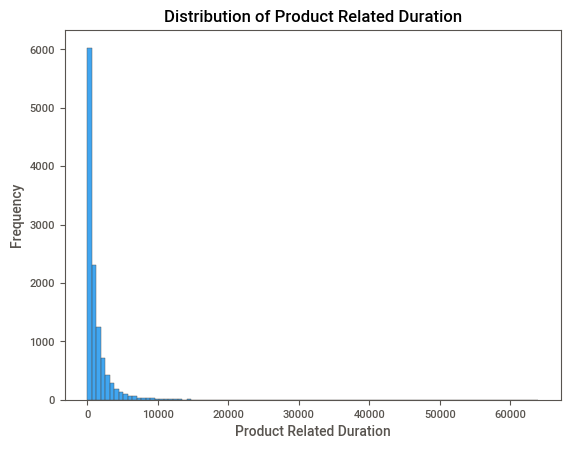

In [ ]:
sns.histplot(df.ProductRelated_Duration, bins=100)
plt.title('Distribution of Product Related Duration')
plt.xlabel('Product Related Duration')
plt.ylabel('Frequency')
plt.show()
# Распределение асимметричное, Большинство клиентов проводят очень мало времени на страницах, посвященных продукту

## Задание 5

Какая доля среди всех клиентов провела 0 минут/секунд на страницах, посвященных продукту? Ответ переведите в проценты и округлите до целого числа.

In [ ]:
answer5 = round(100 * len(df[df.ProductRelated_Duration == 0]) / len(df))
print(f'{answer5}%')     # answer: 5%

5%


## Задание 6

Посмотрите как данный признак влияет на целевую переменную Revenue и сделайте выводы.


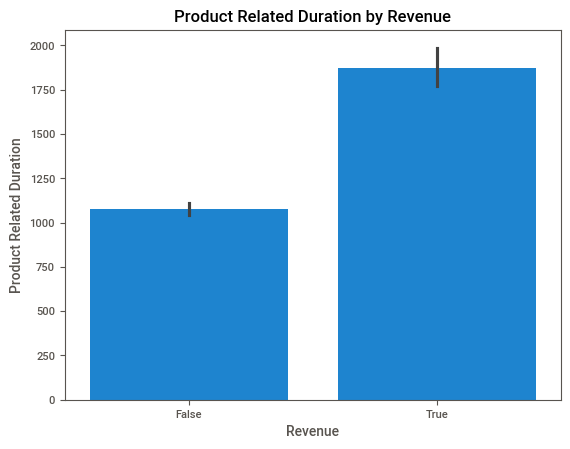

In [ ]:
sns.barplot(x='Revenue', y='ProductRelated_Duration', data = df)
plt.title('Product Related Duration by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Related Duration')
plt.show()
# Визуально видно, что время, проведенное на странице продукта, и факт покупки связаны:
#чем больше времени клиент провел на странице, тем вероятнее, что он совершил покупку

## Задание 7

Исходя из полученной гистограммы, сформулируйте гипотезу о взаимосвязи этих двух факторов. Затем выберите подходящий статистический тест (вам поможет любой мануал по статистике или генеративная модель), проведите его и проанализируйте результат (примите уровень значимости равным 0.95).

In [ ]:
# Для проверки гипотезы был использован тест Манна-Уитни (Mann-Whitney U test), так как данные не являются нормально распределенными согласно тесту Колмогорова-Смирнова.
# Тест Манна-Уитни подходит для сравнения двух независимых выборок с не нормальным распределением.
#H0 (нулевая гипотеза): Время, проведенное на страницах продуктов, для сессий, завершившихся покупкой, меньше или равно времени, проведенному на страницах продуктов, для сессий, не завершившихся покупкой.
#H1 (альтернативная гипотеза): Время, проведенное на страницах продуктов, для сессий, завершившихся покупкой, больше времени, проведенного на страницах продуктов, для сессий, не завершившихся покупкой.

print(df['ProductRelated_Duration'].isnull().sum())
df_cleaned = df.dropna(subset=['ProductRelated_Duration'])

print(df_cleaned[df_cleaned['Revenue'] == True].shape[0])
print(df_cleaned[df_cleaned['Revenue'] == False].shape[0])

purchase_duration = df_cleaned[df_cleaned['Revenue'] == True]['ProductRelated_Duration']
non_purchase_duration = df_cleaned[df_cleaned['Revenue'] == False]['ProductRelated_Duration']

# Kolmogorov-Smirnov test for normality
from scipy.stats import kstest

ks_stat_purchase, ks_p_purchase = kstest(purchase_duration, 'norm', args=(purchase_duration.mean(), purchase_duration.std()))
ks_stat_non_purchase, ks_p_non_purchase = kstest(non_purchase_duration, 'norm', args=(non_purchase_duration.mean(), non_purchase_duration.std()))

print(f"KS test for purchases: Statistic={ks_stat_purchase}, p-value={ks_p_purchase}")
print(f"KS test for non-purchases: Statistic={ks_stat_non_purchase}, p-value={ks_p_non_purchase}")

alpha = 0.05
if ks_p_purchase > alpha:
    print("Purchase data looks Gaussian (fail to reject H0)")
else:
    print("Purchase data does not look Gaussian (reject H0)")

if ks_p_non_purchase > alpha:
    print("Non-purchase data looks Gaussian (fail to reject H0)")
else:
    print("Non-purchase data does not look Gaussian (reject H0)")


from scipy.stats import mannwhitneyu

# Mann-Whitney U test
stat, p_value = mannwhitneyu(purchase_duration, non_purchase_duration, alternative='greater')

print(f"Mann-Whitney U test: Statistic={stat}, p-value={p_value}")
alpha = 0.05  # significance level
if p_value < alpha:
    print("Отвергаем нулевую гипотезу -> Время, проведенное на страницах продуктов, для сессий, завершившихся покупкой, больше времени для сессий, не завершившихся покупкой.")
else:
    print("Не отвергаем нулевую гипотезу -> Время, проведенное на страницах продуктов, для сессий, завершившихся покупкой, не больше времени для сессий, не завершившихся покупкой.")

#answer -Отвергаем нулевую гипотезу -> Время, проведенное на страницах продуктов, для сессий, завершившихся покупкой, больше времени для сессий, не завершившихся покупкой.

489
1821
9911
KS test for purchases: Statistic=0.21020179009933876, p-value=4.550592749019013e-71
KS test for non-purchases: Statistic=0.2747543519032076, p-value=0.0
Purchase data does not look Gaussian (reject H0)
Non-purchase data does not look Gaussian (reject H0)
Mann-Whitney U test: Statistic=12060461.5, p-value=5.810891579972725e-116
Отвергаем нулевую гипотезу -> Время, проведенное на страницах продуктов, для сессий, завершившихся покупкой, больше времени для сессий, не завершившихся покупкой.


## Задание 8

В поле для ответа запишите название статистического теста, который вы использовали, и обоснование, почему вы взяли именно этот тест.

## Задание 9

Постройте матрицу корреляций всех числовых столбцов друг с другом. Используйте корреляцию Спирмена.

Какой столбец наиболее сильно коррелирует с Revenue? В ответе укажите значение коэффициента корреляции, округленного до сотых.

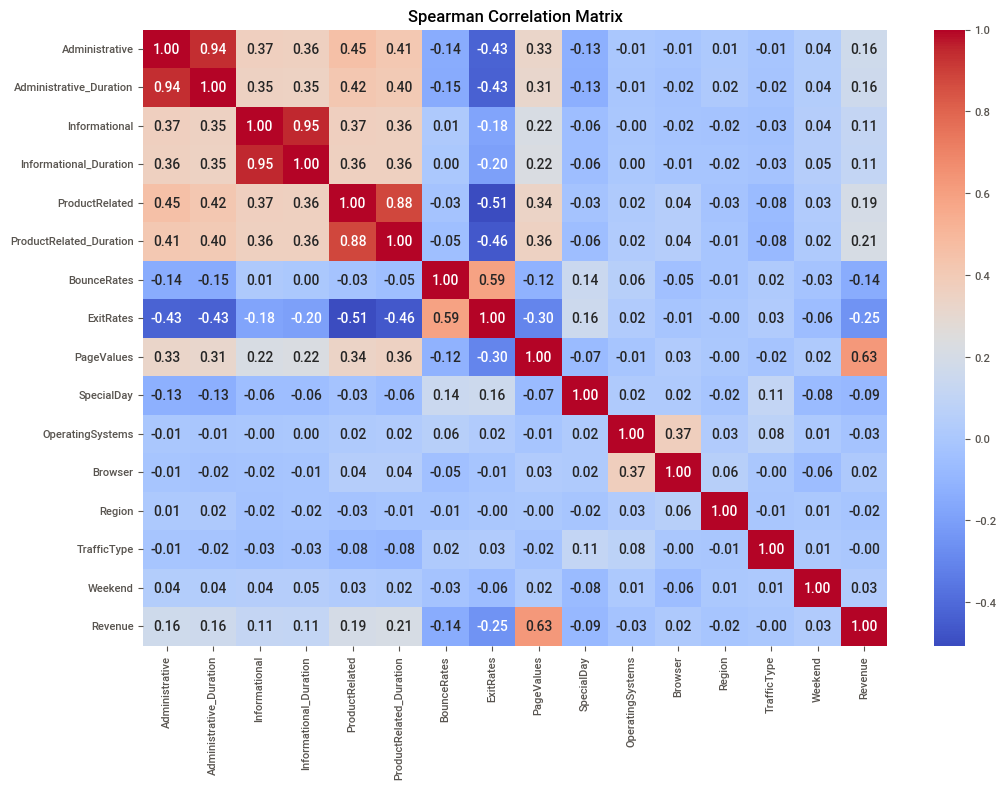

Столбец, наиболее сильно коррелирующий с Revenue: PageValues
Значение коэффициента корреляции: 0.63


In [ ]:
corr_matrix = df.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()

revenue_corr = corr_matrix['Revenue'].drop('Revenue')
most_correlated_column = revenue_corr.idxmax()
max_corr_value = revenue_corr.max()

# answer:
print(f"Столбец, наиболее сильно коррелирующий с Revenue: {most_correlated_column}")
print(f"Значение коэффициента корреляции: {max_corr_value:.2f}")

## Задание 10

Возьмите столбец, который имеет корреляцию с Revenue, равную по модулю 0.14, и проведите анализ этого столбца по аналогии с тем, как вы действовали со столбцом ProductRelated_Duration.

Постройте гистограмму распределения столбца. Какое у него распределение?

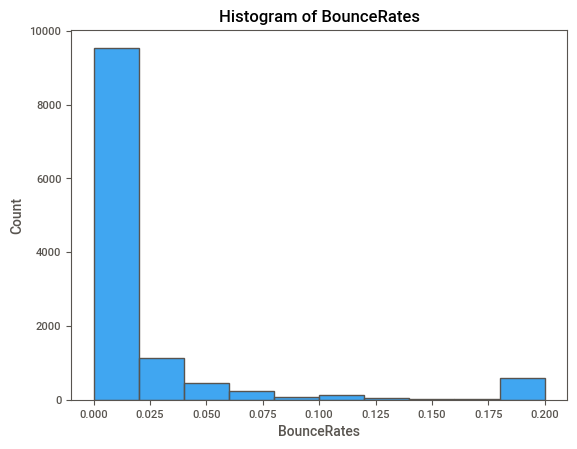

In [ ]:
sns.histplot(df['BounceRates'], bins=10)
plt.title('Histogram of BounceRates')
plt.xlabel('BounceRates')
plt.ylabel('Count')
plt.show()
#распределение не нормальное

## Задание 11

Посмотрите как данный признак влияет на целевую переменную Revenue и сделайте выводы.

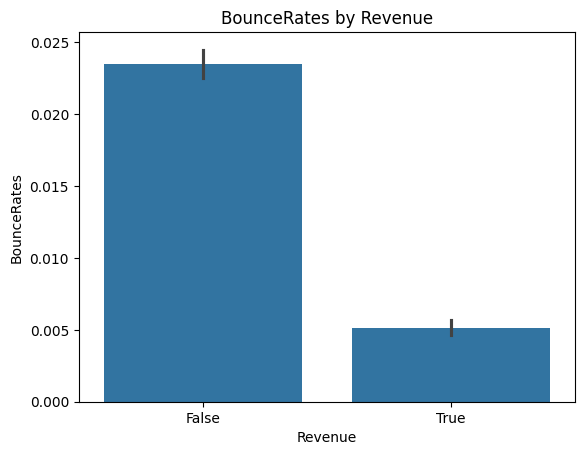

In [ ]:
sns.barplot(x='Revenue', y='BounceRates', data=df)
plt.title('BounceRates by Revenue')
plt.xlabel('Revenue')
plt.ylabel('BounceRates')
plt.show()
# Видно, что чем больше значение признака, тем менее вероятен факт покупки

## Задание 12

Исходя из полученной гистограммы, сформулируйте гипотезу о взаимосвязи этих двух факторов. Затем выберите подходящий статистический тест (вам поможет любой мануал по статистике или генеративная модель), проведите его и проанализируйте результат (примите уровень значимости равным 0.95).

In [ ]:
# H0: Нет значимой разницы в показателях BounceRates между сессиями, завершившимися покупкой, и не завершившимися покупкой.
# H1: Существует значимая разница в показателях BounceRates между сессиями, завершившимися покупкой, и не завершившимися покупкой
# Мы использовали тест Манна-Уитни, так как он подходит для сравнения двух независимых групп, когда данные не соответствуют нормальному распределению.
# Проверка нормальности данных с помощью тестa Колмогорова-Смирнова показала, что данные не являются нормальными.

from scipy.stats import mannwhitneyu

# Разделение данных на две группы
purchase_bounce_rates = df[df['Revenue'] == True]['BounceRates']
non_purchase_bounce_rates = df[df['Revenue'] == False]['BounceRates']

from scipy.stats import kstest
ks_purchase, p_ks_purchase = kstest(purchase_bounce_rates, 'norm', args=(purchase_bounce_rates.mean(), purchase_bounce_rates.std()))
ks_non_purchase, p_ks_non_purchase = kstest(non_purchase_bounce_rates, 'norm', args=(non_purchase_bounce_rates.mean(), non_purchase_bounce_rates.std()))

print(f"KS test for purchases: Statistic={ks_purchase}, p-value={p_ks_purchase}")
print(f"KS test for non-purchases: Statistic={ks_non_purchase}, p-value={p_ks_non_purchase}")
if p_ks_purchase > alpha:
    print("Purchase data looks Gaussian (fail to reject H0)")
else:
    print("Purchase data does not look Gaussian (reject H0)")

if p_ks_non_purchase > alpha:
    print("Non-purchase data looks Gaussian (fail to reject H0)")
else:
    print("Non-purchase data does not look Gaussian (reject H0)")


# Проведение теста Манна-Уитни
stat, p_value = mannwhitneyu(purchase_bounce_rates, non_purchase_bounce_rates)

print(f"Mann-Whitney U test: Statistic={stat}, p-value={p_value}")


alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу -> Существует значимая разница в показателях BounceRates между сессиями, завершившимися покупкой, и не завершившимися покупкой.")
else:
    print("Не отвергаем нулевую гипотезу -> Нет значимой разницы в показателях BounceRates между сессиями, завершившимися покупкой, и не завершившимися покупкой.")
#answer - Отвергаем нулевую гипотезу -> Существует значимая разница в показателях BounceRates между сессиями, завершившимися покупкой, и не завершившимися покупкой.

KS test for purchases: Statistic=0.33725299044293844, p-value=4.443206777702336e-194
KS test for non-purchases: Statistic=0.3157123889288746, p-value=0.0
Purchase data does not look Gaussian (reject H0)
Non-purchase data does not look Gaussian (reject H0)
Mann-Whitney U test: Statistic=7686519.5, p-value=2.632756637833401e-57
Отвергаем нулевую гипотезу -> Существует значимая разница в показателях BounceRates между сессиями, завершившимися покупкой, и не завершившимися покупкой.


## Задание 14

Столбцы OperatingSystems, Browser, Region, TrafficType, Weekend - на самом деле категориальные, а не числовые. Измените тип этих столбцов на `object`.

На данных момент сколько теперь столбцов в таблице имеют тип `object`?

In [ ]:
categorical_columns = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend']
df[categorical_columns] = df[categorical_columns].astype('object')
object_columns_count = df.select_dtypes(include='object').shape[1]
df.info()
print(object_columns_count)
#answer - 7

<class 'pandas.core.frame.DataFrame'>
Index: 12221 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12221 non-null  int64  
 1   Administrative_Duration  12221 non-null  float64
 2   Informational            12221 non-null  int64  
 3   Informational_Duration   12022 non-null  float64
 4   ProductRelated           12221 non-null  int64  
 5   ProductRelated_Duration  11732 non-null  float64
 6   BounceRates              12221 non-null  float64
 7   ExitRates                12122 non-null  float64
 8   PageValues               12221 non-null  float64
 9   SpecialDay               12221 non-null  float64
 10  Month                    12221 non-null  object 
 11  OperatingSystems         12221 non-null  object 
 12  Browser                  12221 non-null  object 
 13  Region                   12221 non-null  object 
 14  TrafficType              12

## Задание 15

Переведите Revenue в категории по правилу: True -> Yes, False -> No.

После этого постройте аналог матрицы корреляций между парами категориальных столбцов с помощью V-меры Крамера.

Какой категориальный столбец сильнее всего "коррелирует" с Revenue?



In [ ]:
!pip install association-metrics -q
import association_metrics as am

df['Revenue'] = df['Revenue'].apply(lambda x: 'Yes' if x else 'No')

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)
cramersv.fit()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Month,1.000000,0.062831,0.066652,0.046936,0.190177,0.137443,0.065412,0.175961
OperatingSystems,0.062831,1.000000,0.594720,0.114603,0.191472,0.453646,0.119875,0.078437
Browser,0.066652,0.594720,1.000000,0.125797,0.189186,0.504222,0.087512,0.048904
Region,0.046936,0.114603,0.125797,1.000000,0.085438,0.174016,0.029911,0.028040
TrafficType,0.190177,0.191472,0.189186,0.085438,1.000000,0.375859,0.150928,0.171864
VisitorType,0.137443,0.453646,0.504222,0.174016,0.375859,1.000000,0.053418,0.103550
Weekend,0.065412,0.119875,0.087512,0.029911,0.150928,0.053418,1.000000,0.027858
Revenue,0.175961,0.078437,0.048904,0.028040,0.171864,0.103550,0.027858,1.000000


In [ ]:
corr_matrix = cramersv.fit()

revenue_corr = corr_matrix['Revenue'].drop('Revenue').abs()
max_corr_column = revenue_corr.idxmax()
max_corr_value = revenue_corr.max()

print(f"Категориальный столбец, который сильнее всего коррелирует с Revenue: {max_corr_column} (коэффициент корреляции: {max_corr_value:.2f})")
#answer - Month

Категориальный столбец, который сильнее всего коррелирует с Revenue: Month (коэффициент корреляции: 0.18)


In [ ]:
df['Revenue'] = df['Revenue'].apply(lambda x: True if x == 'Yes' else False)

Верните Revenue обратно к типу Bool.

## Задание 16

Постройте матрицу $\phi_k$-корреляций всех столбцов в таблице.

Какой фактор сильнее всего коррелирует с Revenue? В ответе укажите значение корреляции, округленное до сотых.

interval columns not set, guessing: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


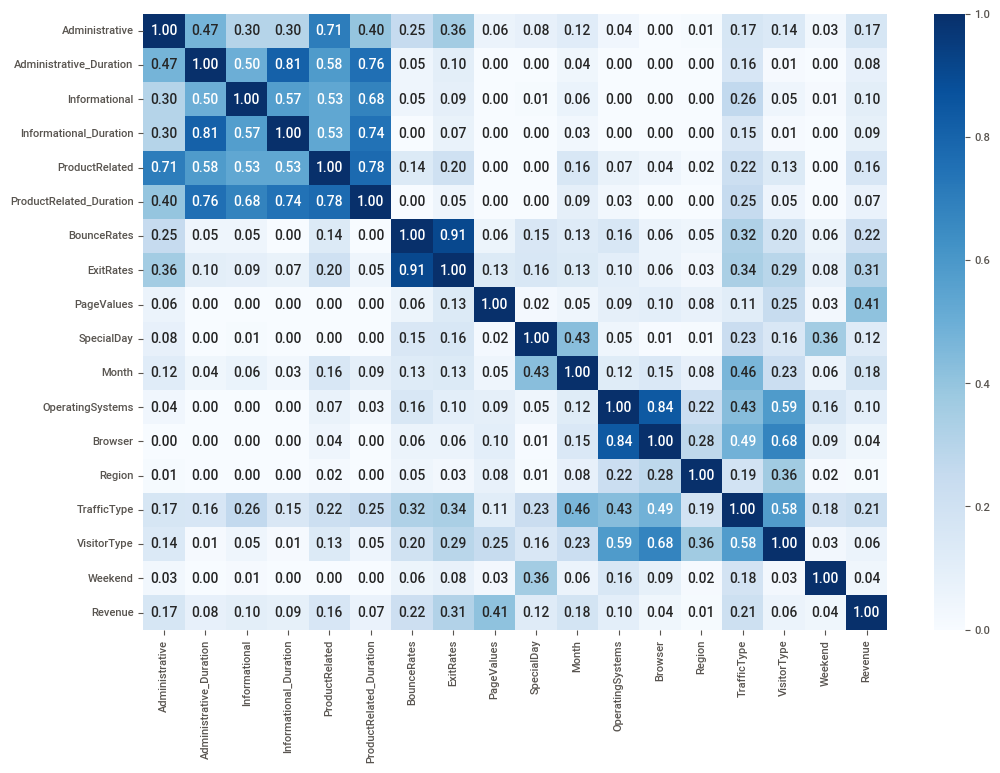

Фактор, который сильнее всего коррелирует с Revenue: PageValues (коэффициент корреляции: 0.41)


In [ ]:
!pip install phik -q
import phik
plt.figure(figsize=(12,8))
ph = df.phik_matrix()
sns.heatmap(ph, cmap='Blues', fmt=".2f", annot=True)
plt.show()

revenue_corr = ph['Revenue'].drop('Revenue').abs()
max_corr_column = revenue_corr.idxmax()
max_corr_value = revenue_corr.max()

print(f"Фактор, который сильнее всего коррелирует с Revenue: {max_corr_column} (коэффициент корреляции: {max_corr_value:.2f})")
#answer - PageValues(коэффициент корреляции: 0.41)

## Задание 17

Постройте любой из рассмотренных в первом занятии курса дашборд по данным, сохраните его в html и скачайте себе на компьютер.

Выложите файл с дашбордом на яндекс/гугл-диск и прикрепите ссылку на него в этом задании.

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

# Create an analysis report for your data
report = sv.analyze(df)

# Display the report
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
link = "https://disk.yandex.ru/d/Pd9LdF58vy8_Tg"

## Задание 18

Наша цель - понять, какие факторы сильнее всего влияют на Revenue и почему.

Проанализируйте построенный дашборд и ответьте текстом на вопросы:

1) Есть ли проблемы в данных (пропуски, дубли, выбросы, ошибочные значения)?

2) Какие три фактора имеют наиболее сильное влияние на Revenue?

3) Постарайтесь описать смысл каждого из этих факторов, а также для каждого из этих факторов объясните по смыслу, почему он сильно влияет на Revenue

4) Укажите два наиболее коррелирующих между собой фактора (без учета Revenue) и объясните, почему между ними такая большая корреляция?

*Я также использовала информацию из второго дэшборда для 1 вопроса


In [ ]:
link="https://disk.yandex.ru/d/uwt6tm_WSIsw-A"

**Анализ**
1.   Проблемы в данных
* 787 пропущенных значений, что составляет 0.4% от общего количества данных.
Пропуски в столбцах Informational_Duration, ProductRelated_Duration, и ExitRates.
* Дубликатов нет, тк мы их удалили до этого.
* В некоторых столбцах, таких как ProductRelated_Duration, присутствуют экстремальные значения. Например, в столбце ProductRelated_Duration максимальное значение составляет 63973.522, что значительно выше среднего значения 1201.393. Такие аномально высокие значения могут указывать на выбросы.

Данные содержат пропуски, потенциальные выбросы. В некоторый столбцах присутствует большое количество нулевых значений, однако, эти нулевые значения могут свидетельствовать не о проблемах в данных, о том, что пользователи не просматривали информационные страницы или не взаимодействовали с продуктами. Эти факторы могут влиять на анализ и интерпретацию данных и требуют дальнейшего исследования и обработки.

2.   Факторы, влияющие на Revenue

Для определения факторов, наиболее сильно влияющих на Revenue, была построена матрица корреляций.

Три фактора с наибольшей корреляцией с Revenue:

* PageValues: коэффициент корреляции 0.49 \\
* ExitRates: коэффициент корреляции 0.20 \\
* ProductRelated: коэффициент корреляции 0.16 \\

Также можно упомянуть, что из категориальных значений на revenue сильнее всего влияют TrafficType, Month, SpecialDay. (в дэшборде колонка these features give information on revenue)

3.   Анализ факторов

* PageValues: \\

Описание: Page Value представляет собой среднюю ценность веб-страницы, которую посетил пользователь перед завершением транзакции электронной коммерции.
Почему влияет:  Высокая корреляция с Revenue объясняется тем, что страницы с высоким значением PageValue часто предшествуют завершению покупки. Это означает, что пользователи, которые посещают такие страницы, с большей вероятностью совершают покупку, что напрямую увеличивает Revenue. Это объясняет высокую корреляцию, поскольку страницы с высокой ценностью, как правило, содержат важную информацию или предложения, побуждающие к покупке.

* ExitRates: \\

Описание: Exit Rate – это процент просмотров страницы, которые были последними в сеансе.
Почему влияет: Высокие значения ExitRates указывают на то, что пользователи часто покидают сайт со страницы, что снижает вероятность совершения покупки. Низкие значения ExitRates могут указывать на большую вовлеченность пользователей и высокую вероятность конверсии.

* ProductRelated: \\

Описание: ProductRelated отражает количество посещений страниц, связанных с продуктами.
Почему влияет: Чем больше пользователи взаимодействуют с продуктами (просматривают, изучают), тем выше вероятность, что они заинтересованы в покупке. Соответственно, большее количество таких взаимодействий увеличивает вероятность того, что пользователь совершит покупку, что положительно влияет на Revenue.

4.   На основе матрицы корреляций:

BounceRates и ExitRates имеют сильную корреляцию (0.90).

BounceRates: Процент посетителей, которые входят на сайт с определенной страницы и покидают его, не переходя на другие страницы.
ExitRates: Процент просмотров страницы, которые были последними в сеансе.
Эти показатели связаны с поведением пользователя на сайте. Если пользователь зашел на сайт и сразу покинул его, не переходя на другие страницы, это увеличивает как показатель отказов (BounceRates), так и показатель выхода (ExitRates). Таким образом, если страница часто является единственной посещенной страницей (высокий BounceRate), она также часто будет последней посещенной страницей (высокий ExitRate). \\

## Полезные доп. материалы

* [Введение в проверку гипотез (кратко)](https://www.codecamp.ru/blog/hypothesis-testing/)

* [Введение в проверку гипотез (подробнее)](https://law.bsu.by/pub/11/barvenov_4.pdf)

* [Основные виды распределений](https://habr.com/ru/articles/801101/)